In [23]:
#pip install rdkit pandas mordred pubchempy
#pip install umap-learn -q
#pip install pubchempy
#pip install mordred

SyntaxError: invalid syntax (<ipython-input-23-befc173c2c5e>, line 3)

In [572]:
import json
from typing import List
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statistics
import numpy as np
import pandas as pd
import math
from math import pi, sqrt
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from mordred import Calculator, descriptors
from sklearn.feature_selection import VarianceThreshold
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
colors = ['#082040', '#175073', '#3285A6', '#B8D0D9', '#6CC5D9']
from sklearn.preprocessing import MinMaxScaler
from gensim.models import word2vec
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


Hometask #1

In [554]:
df = pd.read_csv('qm9.csv')
df = df.sample(n=10, random_state=27)
#df = df.sample(n=20000, random_state=27) долго грузит
df = df.drop(['mol_id'],axis=1)

Hometask #2 and Hometask #3

In [558]:
# Calculate descriptors
import numpy as np
import pandas as pd

desc_list = list(rdMolDescriptors.Properties.GetAvailableProperties())
desc_calc = rdMolDescriptors.Properties(desc_list)
desc_array = np.empty((0, len(desc)), float)

# Calculate descriptors for each molecule
for _, row in df.iterrows():
    smiles = row['smiles']
    molecule = Chem.MolFromSmiles(smiles)

    if molecule is not None:
        descriptors = np.array(desc_calc.ComputeProperties(molecule)).reshape((-1, len(desc_list)))
        desc_array = np.append(desc_array, descriptors, axis=0)

# Create DataFrame with descriptors
desc_df = pd.DataFrame(desc_array, columns=desc_list)

df.reset_index(drop=True, inplace=True)
desc_df.reset_index(drop=True, inplace=True)

# Combine DataFrames
cols = df.columns.to_list() + desc_df.columns.to_list()
dfs = [df, desc_df]
combined_df = np.concatenate(dfs, axis=1)
df = pd.DataFrame(combined_df, columns=cols)

In [559]:
df

,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,c1c[nH]cc1C2(CC2)O,3.6767,1.17974,1.01726,3.2156,78.42,-0.2036,0.0422,0.2458,1193.3474,...,5.093478,3.168747,1.858907,1.858907,1.020429,-0.76,5.05895,1.390234,0.668847,0.781458
1,CC(CCO)C(=O)C#C,3.64803,0.75807,0.67884,4.0462,79.27,-0.2612,-0.0569,0.2043,1648.3088,...,5.424376,2.833301,1.151955,1.151955,0.467002,-0.81,8.19,4.107167,2.887326,3.737522
2,CC1CC(=O)CC1C,3.15229,1.66212,1.29199,2.963,74.26,-0.2333,-0.0113,0.222,1017.0419,...,5.477162,3.215761,2.070697,2.070697,1.203936,-0.33,5.800378,1.883489,0.907978,1.365619
3,CC(C)C1CC1C=O,3.33287,1.29299,1.03723,3.2868,76.83,-0.2444,-0.0165,0.2278,1183.6717,...,5.424756,3.206899,1.922242,1.922242,1.158728,-0.33,5.800378,1.883489,0.907978,1.365619
4,O=C1OC2C3NC3C12,4.41189,2.12184,1.90935,5.5755,56.47,-0.2474,0.0094,0.2568,706.1096,...,4.125898,2.843309,2.281865,2.281865,1.642839,-0.57,3.454517,0.702321,0.164784,0.303272
5,OC1C2NC1C2N1CC1,3.69438,1.18343,1.03541,2.6425,76.0,-0.2325,0.0783,0.3109,1186.4208,...,5.118042,3.559537,2.760095,2.760095,1.894897,-0.12,4.658087,1.166724,0.37707,0.603856
6,CCC1COC1C(N)=O,2.27935,1.28485,0.97985,2.6476,74.69,-0.2347,0.028,0.2628,1284.0592,...,5.462761,3.162789,1.72281,1.72281,0.974901,-0.57,6.548624,2.351356,1.052097,1.710905
7,OC1CC(=O)C1NC=O,2.50147,1.19565,0.96611,4.6855,68.53,-0.2417,-0.0295,0.2122,1228.4604,...,4.702868,2.659186,1.389576,1.389576,0.782359,-0.9,6.223457,2.144233,0.928882,1.482727
8,OC1C2COC(=O)C1O2,2.41704,1.77569,1.64771,4.3743,60.37,-0.2484,-0.005,0.2433,893.3696,...,4.611116,2.790117,1.634671,1.634671,1.033926,-0.61,5.196604,1.457218,0.516402,0.841398
9,O=CC(=O)CC1CCO1,2.822,1.09484,0.92967,2.677,69.64,-0.2474,-0.0928,0.1546,1286.2317,...,5.000766,2.922929,1.353681,1.353681,0.71801,-0.7,6.420482,2.731049,1.605897,1.948295


In [523]:
 #дескрипторs
desc = list(rdMolDescriptors.Properties.GetAvailableProperties())
desc_g = rdMolDescriptors.Properties(desc)
desc_set = np.empty((0, len(desc)), float)

# Расчет
for _, row in df.iterrows():
    smiles = row['smiles']
    molecule = Chem.MolFromSmiles(smiles)

    if molecule is not None:
        descriptors = np.array(desc_g.ComputeProperties(molecule)).reshape((-1, len(desc)))
        desc_set = np.append(desc_set, descriptors, axis=0)

# Создание DataFrame с дескрипторами
df_d = pd.DataFrame(desc_set, columns=desc)

df.reset_index(drop=True, inplace=True)
df_d.reset_index(drop=True, inplace=True)


cols = df.columns.to_list() + df_d.columns.to_list()
dfs = [df,df_d]
df = np.concatenate(dfs, axis=1)
df = pd.DataFrame(df, columns=cols)



In [560]:
from mordred import descriptors
from rdkit import Chem

new_calc = Calculator(descriptors)
new_molecules = [Chem.MolFromSmiles(smiles) for smiles in df['smiles']]
new_df_with_descriptors = new_calc.pandas(new_molecules)
df = pd.concat([df, new_df_with_descriptors], axis=1)

100%|██████████| 10/10 [00:01<00:00,  5.20it/s]


In [525]:
from mordred import descriptors
calc = Calculator(descriptors)
molecules = [Chem.MolFromSmiles(smiles) for smiles in df['smiles']]
df_with_descriptors = calc.pandas(molecules)
df = pd.concat([df, df_with_descriptors], axis=1)
df

100%|██████████| 10/10 [00:01<00:00,  9.43it/s]


,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,c1c[nH]cc1C2(CC2)O,3.6767,1.17974,1.01726,3.2156,78.42,-0.2036,0.0422,0.2458,1193.3474,...,9.329101,59.450084,123.068414,6.837134,82,8,50.0,60.0,2.673611,1.916667
1,CC(CCO)C(=O)C#C,3.64803,0.75807,0.67884,4.0462,79.27,-0.2612,-0.0569,0.2043,1648.3088,...,8.201660,36.057708,126.068080,6.635162,98,9,34.0,35.0,4.972222,2.361111
2,CC1CC(=O)CC1C,3.15229,1.66212,1.29199,2.963,74.26,-0.2333,-0.0113,0.222,1017.0419,...,8.593599,50.007331,112.088815,5.604441,59,7,38.0,42.0,3.833333,1.777778
3,CC(C)C1CC1C=O,3.33287,1.29299,1.03723,3.2868,76.83,-0.2444,-0.0165,0.2278,1183.6717,...,8.902047,56.153783,112.088815,5.604441,67,7,38.0,44.0,3.833333,1.888889
4,O=C1OC2C3NC3C12,4.41189,2.12184,1.90935,5.5755,56.47,-0.2474,0.0094,0.2568,706.1096,...,10.294888,61.526289,111.032028,8.540925,56,6,54.0,72.0,2.055556,1.555556
5,OC1C2NC1C2N1CC1,3.69438,1.18343,1.03541,2.6425,76.0,-0.2325,0.0783,0.3109,1186.4208,...,10.406775,60.879524,126.079313,6.635753,85,8,58.0,76.0,2.305556,1.805556
6,CCC1COC1C(N)=O,2.27935,1.28485,0.97985,2.6476,74.69,-0.2347,0.028,0.2628,1284.0592,...,9.223158,38.914584,129.078979,6.453949,90,9,42.0,48.0,4.083333,2.138889
7,OC1CC(=O)C1NC=O,2.50147,1.19565,0.96611,4.6855,68.53,-0.2417,-0.0295,0.2122,1228.4604,...,9.309190,39.095097,129.042593,8.065162,92,8,42.0,48.0,4.083333,2.138889
8,OC1C2COC(=O)C1O2,2.41704,1.77569,1.64771,4.3743,60.37,-0.2484,-0.005,0.2433,893.3696,...,9.749229,40.414315,130.026609,8.668441,78,10,50.0,61.0,3.194444,1.916667
9,O=CC(=O)CC1CCO1,2.822,1.09484,0.92967,2.677,69.64,-0.2474,-0.0928,0.1546,1286.2317,...,8.788593,37.966073,128.047344,7.532197,98,7,40.0,43.0,3.472222,2.166667


In [561]:
df= df.drop_duplicates()
df = df.dropna()
# Выбор столбцов с типом значений float
selected_columns = ['smiles','gap'] + [col for col, dtype in df.dtypes.items() if (dtype == 'float') and (col not in ['smiles','gap'])]

# Создание нового датафрейма, содержащего только выбранные столбцы
df = df[selected_columns]

In [563]:
df_filter = df.drop(['smiles'], axis=1)
corr_matrix = df.corr(numeric_only=True)
threshold = 0.8
gap_values = df['gap']
filter_threshold = threshold
related_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > filter_threshold:
            col_name = corr_matrix.columns[i]
            if col_name != 'gap':
                related_features.add(col_name)
df_filtered = df.drop(columns=related_features)
df=df_filtered

In [528]:
df_ex = df.drop(['smiles'],axis=1) #возьмём все столбцы кроме опозновательных
correlation_matrix = df.corr(numeric_only=True)
gap = df['gap']
FILTER_THRESHOLD = 0.8 #Пороговое значение для корреляции
highly_correlated_features = set() #Пустое множество для хранения сильно коррелирующих признаков

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > FILTER_THRESHOLD:
            colname = correlation_matrix.columns[i]
            if colname != 'gap': # целевая переменная её нельзя удалить
              highly_correlated_features.add(colname)
df = df.drop(columns=highly_correlated_features) # удалим коррелирующие колонки

In [564]:
df

,smiles,gap,SpAbs_A,SpMax_A,VE1_A,VE2_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,...,GGI3,GGI7,GGI8,GGI9,GGI10,JGI7,JGI8,JGI9,JGI10,JGT10
0,c1c[nH]cc1C2(CC2)O,0.2458,11.806056,2.481194,2.754399,0.306044,108.0,0.0,0.0,0.0,...,0.472222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450231
1,CC(CCO)C(=O)C#C,0.2043,10.312845,2.111991,2.713067,0.301452,120.0,56.0,15.0,0.0,...,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498889
2,CC1CC(=O)CC1C,0.222,9.191688,2.278414,2.682596,0.335325,80.0,0.0,0.0,0.0,...,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544462
3,CC(C)C1CC1C=O,0.2278,9.629326,2.403476,2.506528,0.313316,78.0,12.0,0.0,0.0,...,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.587063
4,O=C1OC2C3NC3C12,0.2568,10.618439,2.702551,2.694432,0.336804,140.0,0.0,0.0,0.0,...,0.659722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483565
5,OC1C2NC1C2N1CC1,0.3109,11.346930,2.652985,2.828510,0.314279,110.0,20.0,0.0,0.0,...,0.930556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.435794
6,CCC1COC1C(N)=O,0.2628,9.907543,2.343259,2.724101,0.302678,124.0,9.0,0.0,0.0,...,0.937500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519722
7,OC1CC(=O)C1NC=O,0.2122,10.665324,2.364871,2.671920,0.296880,160.0,78.0,0.0,0.0,...,1.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.565567
8,OC1C2COC(=O)C1O2,0.2433,11.449642,2.471798,2.838063,0.315340,180.0,0.0,0.0,0.0,...,1.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.540972
9,O=CC(=O)CC1CCO1,0.1546,10.540144,2.224278,2.738406,0.304267,154.0,66.0,12.0,0.0,...,0.562500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474354


In [530]:
FILTER_THRESHOLD = 0.8 #Пороговое значение для корреляции
highly_correlated_features = set() #Пустое множество для хранения сильно коррелирующих признаков

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > FILTER_THRESHOLD:
            colname = correlation_matrix.columns[i]
            if colname != 'gap': # целевая переменная её нельзя удалить
              highly_correlated_features.add(colname)
df = df.drop(columns=highly_correlated_features) # удалим коррелирующие колонки

In [531]:
df

,smiles,gap,SpAbs_A,SpMax_A,VE1_A,VE2_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,...,GGI3,GGI7,GGI8,GGI9,GGI10,JGI7,JGI8,JGI9,JGI10,JGT10
0,c1c[nH]cc1C2(CC2)O,0.2458,11.806056,2.481194,2.754399,0.306044,108.0,0.0,0.0,0.0,...,0.472222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450231
1,CC(CCO)C(=O)C#C,0.2043,10.312845,2.111991,2.713067,0.301452,120.0,56.0,15.0,0.0,...,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498889
2,CC1CC(=O)CC1C,0.222,9.191688,2.278414,2.682596,0.335325,80.0,0.0,0.0,0.0,...,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544462
3,CC(C)C1CC1C=O,0.2278,9.629326,2.403476,2.506528,0.313316,78.0,12.0,0.0,0.0,...,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.587063
4,O=C1OC2C3NC3C12,0.2568,10.618439,2.702551,2.694432,0.336804,140.0,0.0,0.0,0.0,...,0.659722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483565
5,OC1C2NC1C2N1CC1,0.3109,11.346930,2.652985,2.828510,0.314279,110.0,20.0,0.0,0.0,...,0.930556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.435794
6,CCC1COC1C(N)=O,0.2628,9.907543,2.343259,2.724101,0.302678,124.0,9.0,0.0,0.0,...,0.937500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519722
7,OC1CC(=O)C1NC=O,0.2122,10.665324,2.364871,2.671920,0.296880,160.0,78.0,0.0,0.0,...,1.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.565567
8,OC1C2COC(=O)C1O2,0.2433,11.449642,2.471798,2.838063,0.315340,180.0,0.0,0.0,0.0,...,1.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.540972
9,O=CC(=O)CC1CCO1,0.1546,10.540144,2.224278,2.738406,0.304267,154.0,66.0,12.0,0.0,...,0.562500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474354


Hometask #4

In [532]:
df1= df.drop(columns=['smiles'])
df.to_excel('1.xlsx')

In [533]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

df_for_clust = preprocessing.normalize(df1)
df_for_clust

array([[ 4.47518267e-04,  2.14948158e-02,  4.51741161e-03,
         5.01482395e-03,  5.57202661e-04,  1.96631297e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.67500734e-01,  1.18342910e-01,
         0.00000000e+00,  0.00000000e+00,  1.31251896e-01,
         9.19433380e-02,  8.37503672e-01,  2.78785889e-01,
         2.98235332e-01, -1.54580674e-05, -1.01628328e-04,
         1.96226706e-02, -1.37560990e-02, -6.31162188e-02,
        -1.67905326e-02, -2.93328581e-02,  0.00000000e+00,
        -8.10466151e-03, -1.26195912e-02, -9.24885682e-03,
        -2.34662865e-02, -9.04261212e-02, -9.54835105e-02,
         5.33996185e-04, -1.12818685e-03, -8.32551127e-04,
         2.57671452e-03,  1.95381745e-03,  1.74346452e-03,
         7.80282925e-04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.35778783e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

Hometask #5

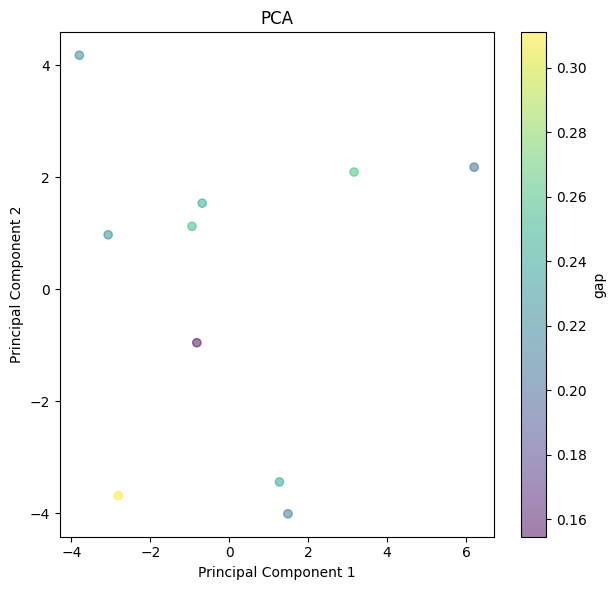

In [565]:
X = df.drop(columns=['gap', 'smiles'])
y = df['gap']

imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)

# Applying Principal Component Analysis
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creating a new figure for the plot
plt.figure(figsize=(12, 6))

# Plotting PCA
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='gap')

# Displaying the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



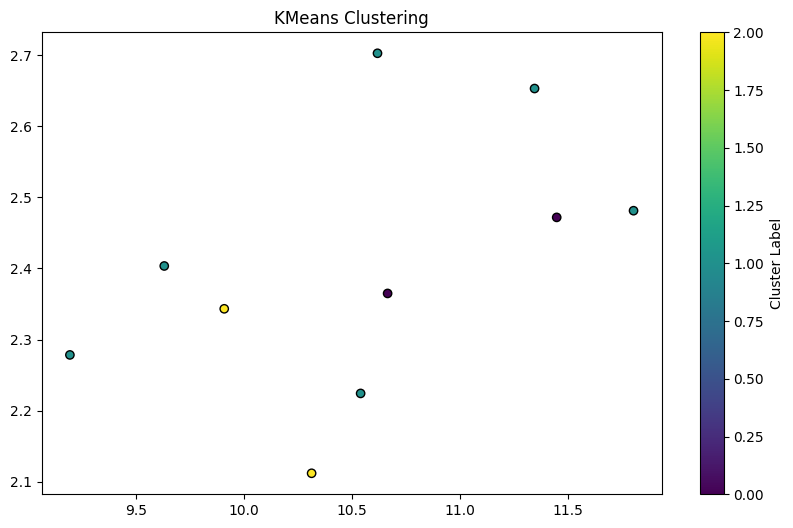

In [567]:
df = df.fillna(0)

X = df.drop(columns=['gap', 'smiles'])
y = df['gap']

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X_scaled)

labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


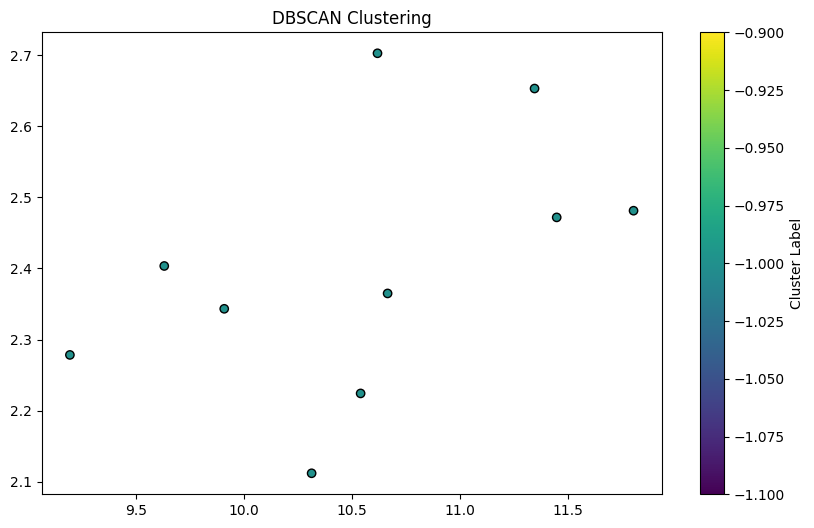

In [570]:
dbscan = DBSCAN()

dbscan.fit(X_scaled)

cluster_labels = dbscan.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

Hometask #6

In [571]:
X = df.drop(['smiles','gap'], axis=1)
y = df['gap']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)



#X_pred = df_2.drop(['ДЕФОЛТ60 (Прогноз)', 'Скоринговый балл','ИД'], axis=1)

print('Размер обучающей выборки {}, \nРазмер тестовой выборки  {} \n'. format(len(X_train), len(X_test)))

Размер обучающей выборки 8, 
Размер тестовой выборки  2 



Training RandomForest...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/

Training GradientBoosting...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.10/dist-packages/

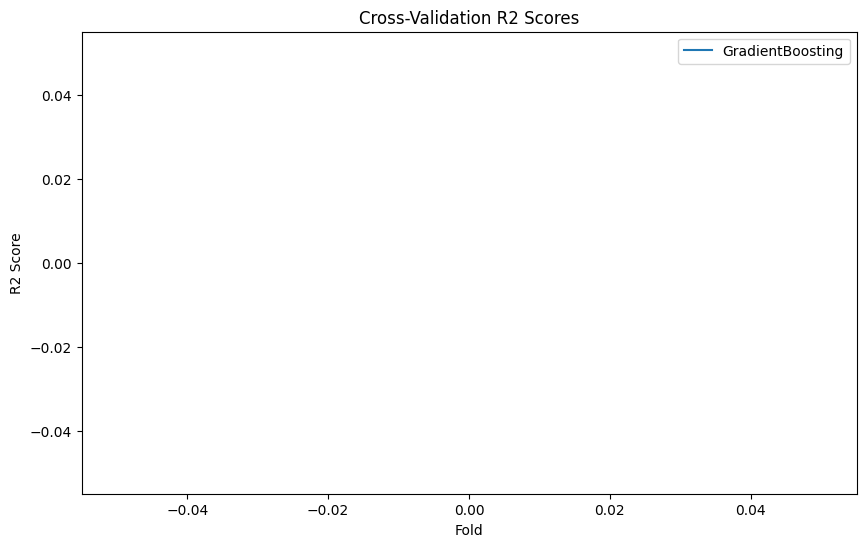

R2 Score Comparison:
GradientBoosting: -0.21989248853731835


In [579]:
models =    { 'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    print(f'Training {name}...')
    scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    y_pred = cross_val_predict(model, X, y, cv=cv)
    r2 = r2_score(y, y_pred)
results[name] = {'scores': scores, 'r2': r2}

# Visualizing the results
plt.figure(figsize=(10, 6))
for name, result in results.items():
    plt.plot(result['scores'], label=name)
plt.title('Cross-Validation R2 Scores')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

# Comparing R2 Scores
print('R2 Score Comparison:')
for name, result in results.items():
    print(f'{name}: {result["r2"]}')